In [24]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [7]:
plt.style.use('ggplot')
%matplotlib inline

In [8]:
df = pd.read_csv('menu.csv')

In [31]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (260, 24)

First 5 rows:


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 n

In [10]:
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [11]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

Number of duplicate rows: 0


In [13]:
print("Data Types:")
print(df.dtypes)


Data Types:
Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtyp

In [16]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", list(numerical_cols))

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
Categorical columns: ['Category', 'Item', 'Serving Size']


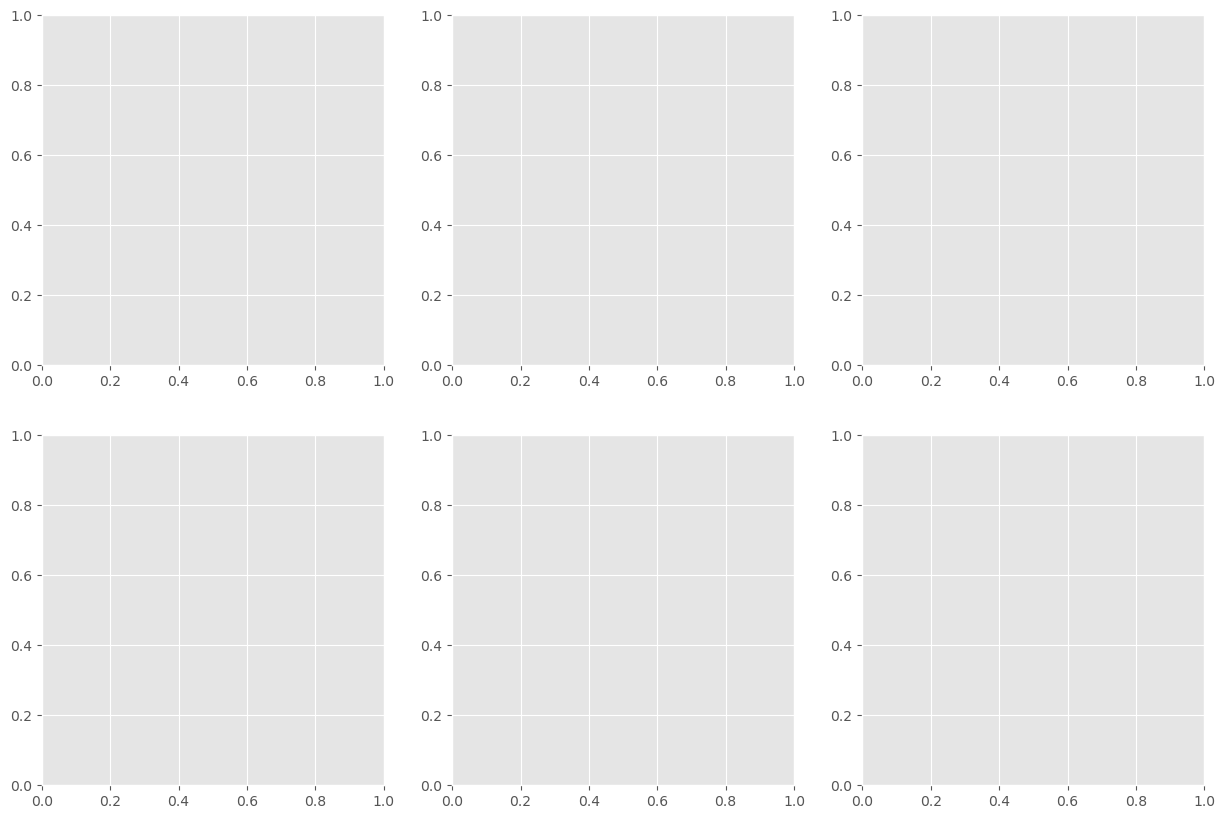

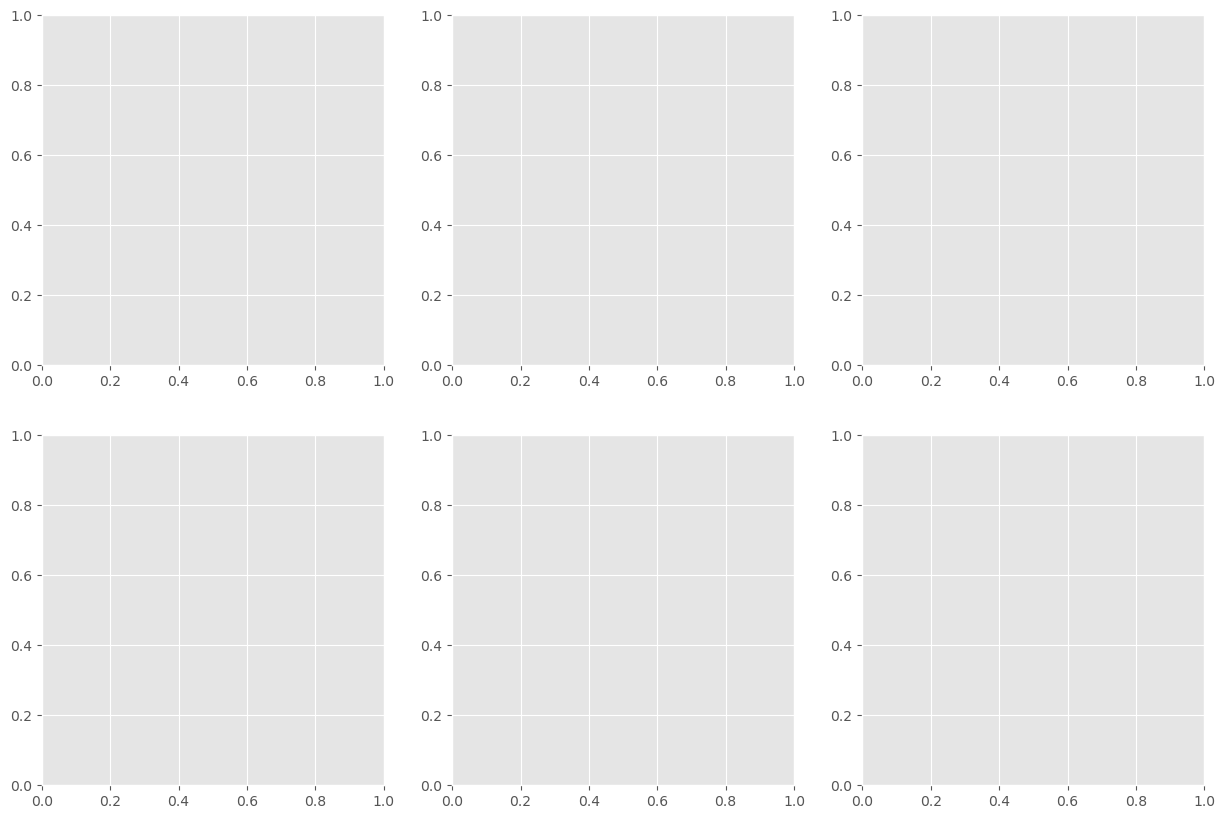

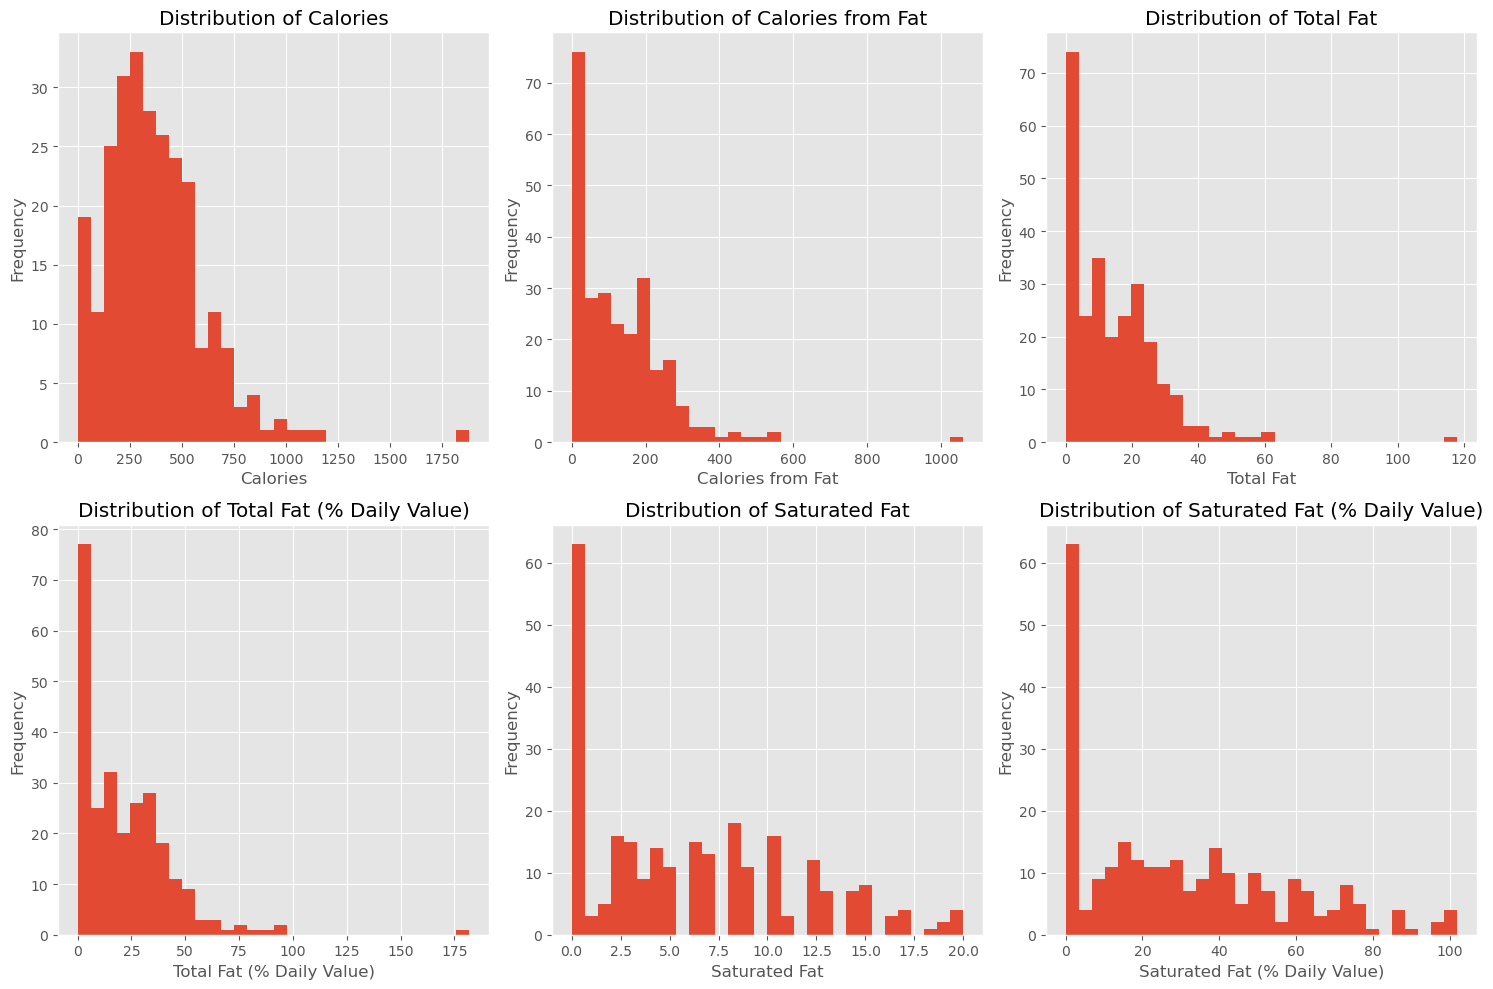

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]): 
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

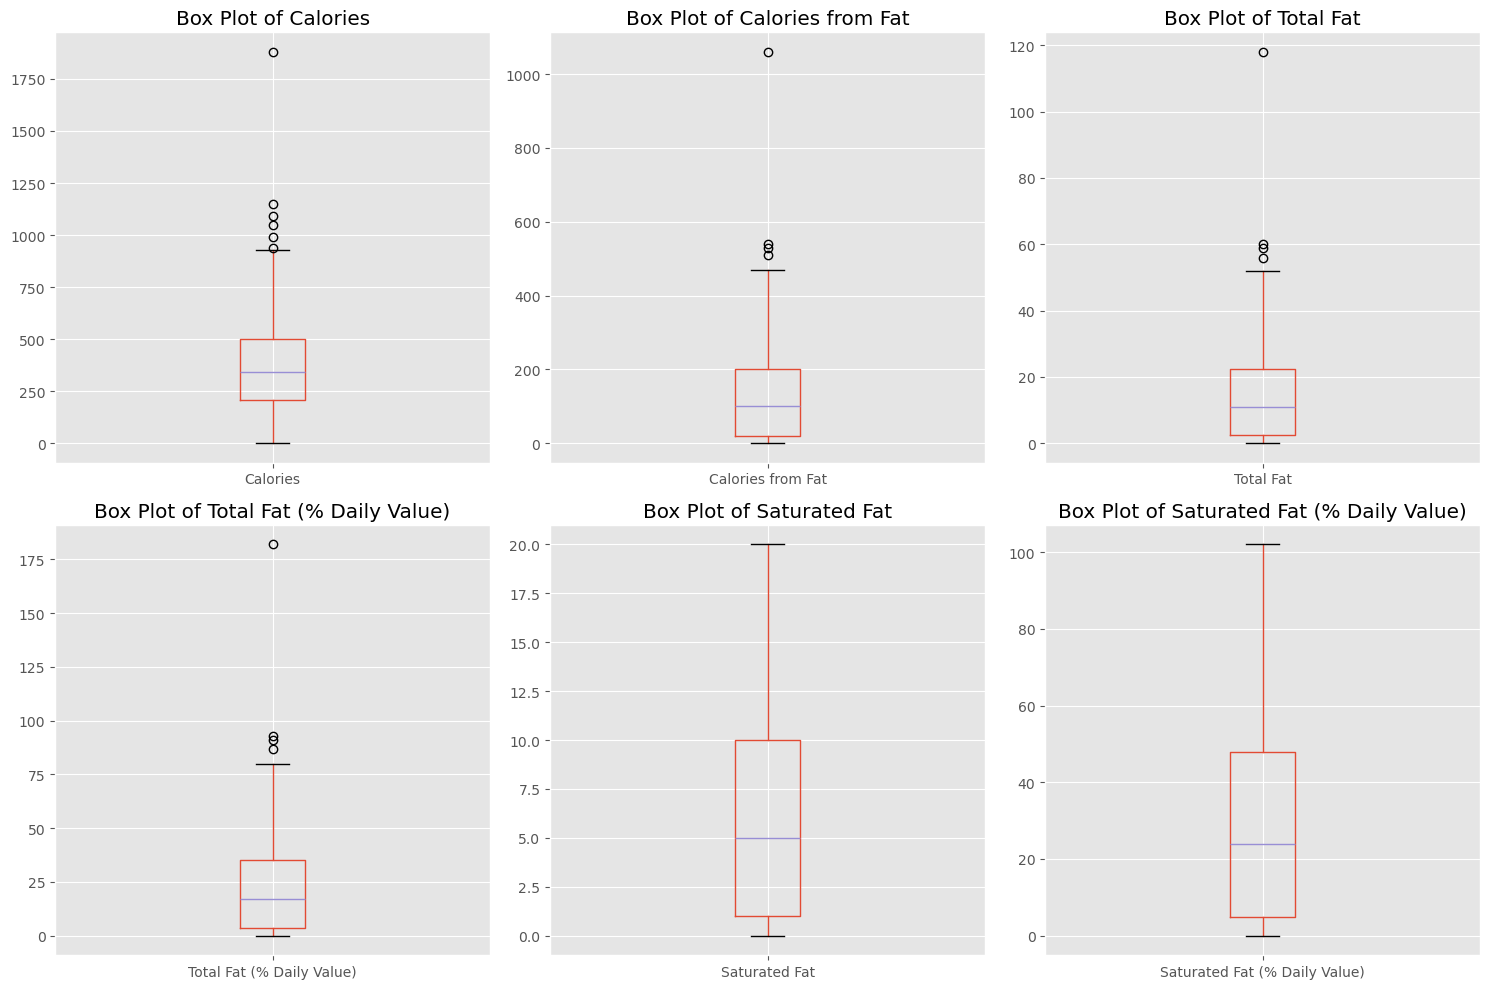

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:6]): 
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

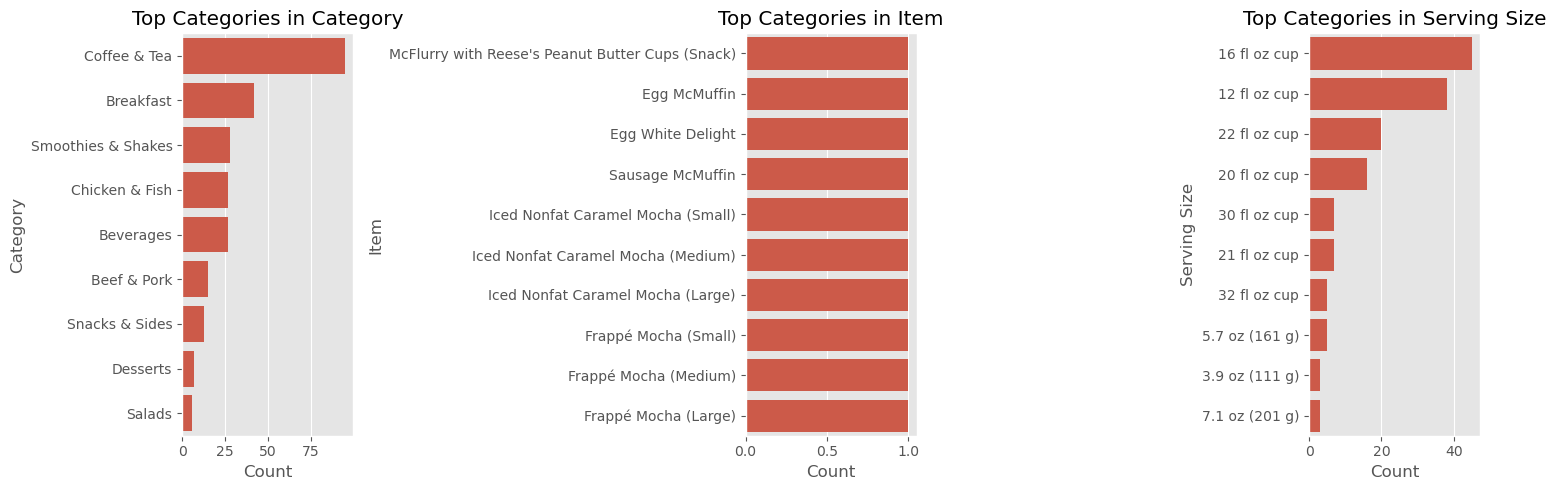


Value counts for Category:
Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

Value counts for Item:
Item
McFlurry with Reese's Peanut Butter Cups (Snack)    1
Egg McMuffin                                        1
Egg White Delight                                   1
Sausage McMuffin                                    1
Iced Nonfat Caramel Mocha (Small)                   1
Iced Nonfat Caramel Mocha (Medium)                  1
Iced Nonfat Caramel Mocha (Large)                   1
Frappé Mocha (Small)                                1
Frappé Mocha (Medium)                               1
Frappé Mocha (Large)                                1
Name: count, dtype: int64

Value counts for Serving Size:
Serving Size
16 fl oz cup      45
12 fl oz cup      38
22 fl oz cup      20
20 fl oz 

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    fig, axes = plt.subplots(1, min(3, len(categorical_cols)), figsize=(15, 5))
    if len(categorical_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols[:3]):  
        value_counts = df[col].value_counts()
        if len(value_counts) > 10:  
            value_counts = value_counts.head(10)
        
        sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i])
        axes[i].set_title(f'Top Categories in {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts().head(10))  

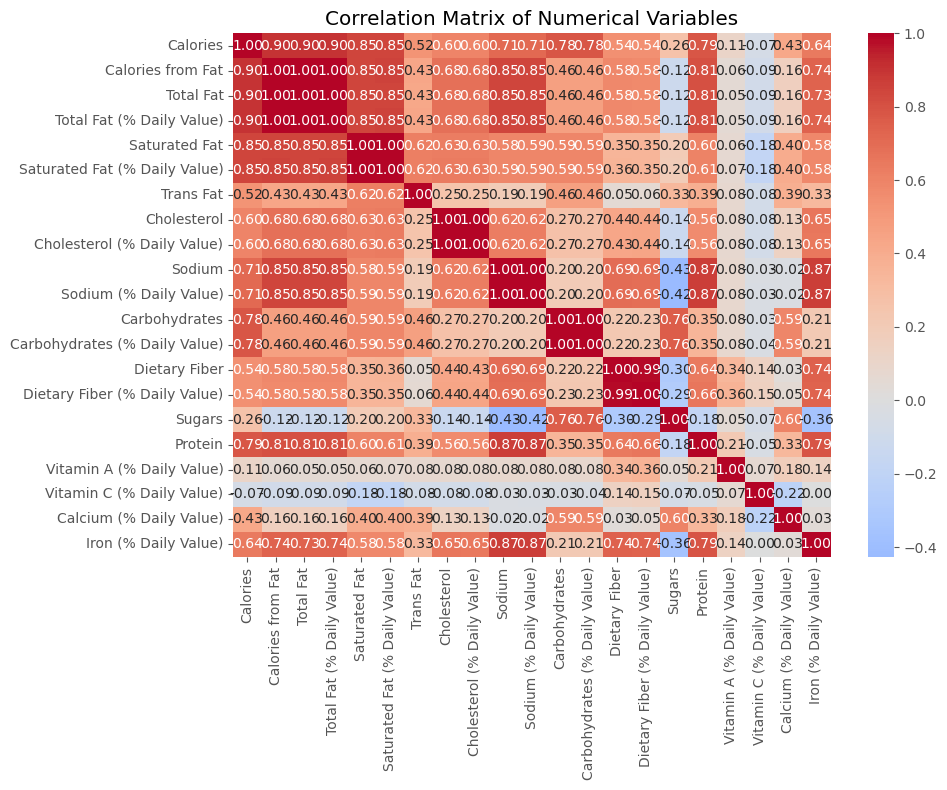

Highly correlated pairs (|r| > 0.7):
Calories from Fat - Calories: 0.905
Total Fat - Calories: 0.904
Total Fat - Calories from Fat: 1.000
Total Fat (% Daily Value) - Calories: 0.904
Total Fat (% Daily Value) - Calories from Fat: 1.000
Total Fat (% Daily Value) - Total Fat: 1.000
Saturated Fat - Calories: 0.846
Saturated Fat - Calories from Fat: 0.847
Saturated Fat - Total Fat: 0.847
Saturated Fat - Total Fat (% Daily Value): 0.847
Saturated Fat (% Daily Value) - Calories: 0.848
Saturated Fat (% Daily Value) - Calories from Fat: 0.850
Saturated Fat (% Daily Value) - Total Fat: 0.849
Saturated Fat (% Daily Value) - Total Fat (% Daily Value): 0.850
Saturated Fat (% Daily Value) - Saturated Fat: 0.999
Cholesterol (% Daily Value) - Cholesterol: 1.000
Sodium - Calories: 0.712
Sodium - Calories from Fat: 0.847
Sodium - Total Fat: 0.846
Sodium - Total Fat (% Daily Value): 0.847
Sodium (% Daily Value) - Calories: 0.713
Sodium (% Daily Value) - Calories from Fat: 0.847
Sodium (% Daily Value) - T

In [19]:
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr.append((correlation_matrix.columns[i], 
                                 correlation_matrix.columns[j], 
                                 correlation_matrix.iloc[i, j]))
    
    print("Highly correlated pairs (|r| > 0.7):")
    for pair in high_corr:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

In [22]:
date_columns = df.select_dtypes(include=['datetime64']).columns
if len(date_columns) > 0:
    for date_col in date_columns:
        print(f"\nTime analysis for {date_col}:")
        
        df['year'] = df[date_col].dt.year
        df['month'] = df[date_col].dt.month
        df['day'] = df[date_col].dt.day
        
        if 'sales' in df.columns or 'amount' in df.columns:
            sales_col = 'sales' if 'sales' in df.columns else 'amount'
            plt.figure(figsize=(12, 6))
            time_series = df.groupby(date_col)[sales_col].sum()
            time_series.plot()
            plt.title(f'{sales_col.capitalize()} Over Time')
            plt.ylabel(sales_col.capitalize())
            plt.xlabel('Date')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [23]:
if 'sales' in df.columns or 'amount' in df.columns:
    sales_col = 'sales' if 'sales' in df.columns else 'amount'
    
    for cat_col in categorical_cols[:3]:  
        plt.figure(figsize=(12, 6))
        sales_by_category = df.groupby(cat_col)[sales_col].sum().sort_values(ascending=False)
        if len(sales_by_category) > 10:  
            sales_by_category = sales_by_category.head(10)
        
        sales_by_category.plot(kind='bar')
        plt.title(f'{sales_col.capitalize()} by {cat_col}')
        plt.ylabel(sales_col.capitalize())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Price analysis (if you have price and quantity columns)
if 'price' in df.columns and 'quantity' in df.columns:
    # Calculate total sales if not already present
    if 'sales' not in df.columns:
        df['sales'] = df['price'] * df['quantity']
    
    # Price distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df['price'].hist(bins=30)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    df['quantity'].hist(bins=30)
    plt.title('Quantity Distribution')
    plt.xlabel('Quantity')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [25]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
}).sort_values('Percentage', ascending=False)

print("Missing Value Analysis:")
display(missing_df[missing_df['Missing Values'] > 0])

if missing_df[missing_df['Missing Values'] > 0].shape[0] > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Values'] > 0]['Percentage'].plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Missing Value Analysis:


,Missing Values,Percentage


In [26]:
print("Outlier Analysis:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers ({outlier_percentage:.2f}%)")

Outlier Analysis:
Calories: 6 outliers (2.31%)
Calories from Fat: 4 outliers (1.54%)
Total Fat: 4 outliers (1.54%)
Total Fat (% Daily Value): 4 outliers (1.54%)
Trans Fat: 56 outliers (21.54%)
Cholesterol: 18 outliers (6.92%)
Cholesterol (% Daily Value): 18 outliers (6.92%)
Sodium: 5 outliers (1.92%)
Sodium (% Daily Value): 5 outliers (1.92%)
Carbohydrates: 17 outliers (6.54%)
Carbohydrates (% Daily Value): 16 outliers (6.15%)
Dietary Fiber (% Daily Value): 4 outliers (1.54%)
Sugars: 4 outliers (1.54%)
Protein: 3 outliers (1.15%)
Vitamin A (% Daily Value): 17 outliers (6.54%)
Vitamin C (% Daily Value): 46 outliers (17.69%)
Calcium (% Daily Value): 2 outliers (0.77%)
Iron (% Daily Value): 2 outliers (0.77%)


In [27]:
print("=" * 50)
print("EDA SUMMARY")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df)}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

if 'sales' in df.columns or 'amount' in df.columns:
    sales_col = 'sales' if 'sales' in df.columns else 'amount'
    total_sales = df[sales_col].sum()
    avg_sales = df[sales_col].mean()
    print(f"\nSales Analysis:")
    print(f"Total sales: ${total_sales:,.2f}")
    print(f"Average sales per transaction: ${avg_sales:,.2f}")

print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows removed: {duplicates}")

data_quality = {}
for col in df.columns:
    unique_ratio = df[col].nunique() / len(df)
    data_quality[col] = {
        'unique_values': df[col].nunique(),
        'unique_ratio': unique_ratio,
        'missing_values': df[col].isnull().sum()
    }

print("\nData Quality Assessment:")
quality_df = pd.DataFrame(data_quality).T
display(quality_df)

EDA SUMMARY
Dataset shape: (260, 24)
Total records: 260
Numerical columns: 21
Categorical columns: 3

Missing values: 0
Duplicate rows removed: 0

Data Quality Assessment:


,unique_values,unique_ratio,missing_values
Category,9.0,0.034615,0.0
Item,260.0,1.000000,0.0
Serving Size,107.0,0.411538,0.0
Calories,78.0,0.300000,0.0
Calories from Fat,48.0,0.184615,0.0
Total Fat,52.0,0.200000,0.0
Total Fat (% Daily Value),63.0,0.242308,0.0
Saturated Fat,26.0,0.100000,0.0
Saturated Fat (% Daily Value),74.0,0.284615,0.0
Trans Fat,5.0,0.019231,0.0
